# Titanic Survival Prediction

In this data science project I am building the machine learning model using classification algorithms to predict if the passenger from the titanic survived or not. The dataset is available here https://www.kaggle.com/datasets/yasserh/titanic-dataset.


##  Importing all the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

Experimenting two classification algorithms ie. K Nearest Neighbor classifier and Random forest classifier

In [3]:
df=pd.read_csv("Titanic-Dataset.csv")

## EDA

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking and handling the nan and missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.shape

(891, 12)

Since Cabin has 687 rows of missing values which is more than 70% of total data and name is not an important attribute
so we drop these columns

In [8]:
df.drop(['Name', 'Ticket','Cabin'], axis=1, inplace=True)

In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [10]:
mean_age=df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

In [11]:
df['Embarked'].fillna("S", inplace=True)


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Checking how much is the dataset balanced

In [13]:
count=df['Survived'].value_counts()

In [14]:
count

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

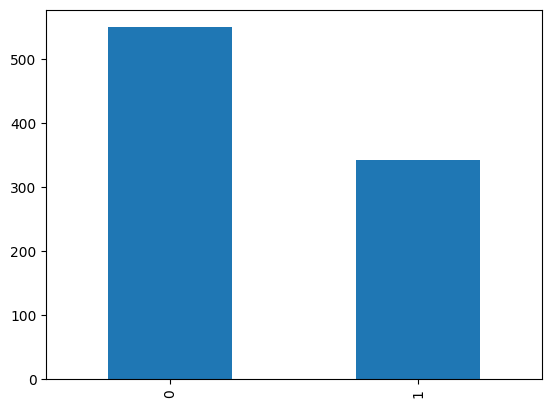

In [15]:
count.plot(kind='bar')


###  Encoding Categorical data

In [16]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


Converting the categorical data into numeric using one hot encoding. get_dummies()
Columns to be encoded: sex, embarked and Pclass

In [17]:
df["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [18]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [19]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [20]:
df1=pd.get_dummies(df, columns=["Sex","Embarked", "Pclass"])

In [21]:
df1

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,0,1,0,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,1,0,1,0,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,0,0,1
3,4,1,35.000000,1,0,53.1000,1,0,0,0,1,1,0,0
4,5,0,35.000000,0,0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.000000,0,0,13.0000,0,1,0,0,1,0,1,0
887,888,1,19.000000,0,0,30.0000,1,0,0,0,1,1,0,0
888,889,0,29.699118,1,2,23.4500,1,0,0,0,1,0,0,1
889,890,1,26.000000,0,0,30.0000,0,1,1,0,0,1,0,0


### Standard Scaling

Scaling columns Age and Fare use standardscaler. Its basically z-score normalization.

z=(x-u)/sd where x=value, u=mean(0), rho=standard deviation(1)

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

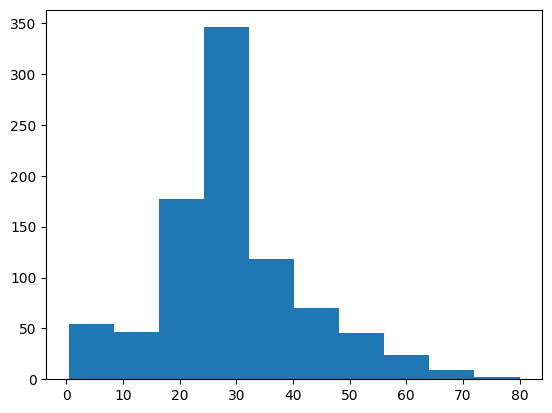

In [22]:
plt.hist(df["Age"])

Note: Since age is normally distributed we will use standard scaler.

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaling=StandardScaler()

In [25]:
df1[["Age"]]=scaling.fit_transform(df1[["Age"]])

In [26]:
df1

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,-0.592481,1,0,7.2500,0,1,0,0,1,0,0,1
1,2,1,0.638789,1,0,71.2833,1,0,1,0,0,1,0,0
2,3,1,-0.284663,0,0,7.9250,1,0,0,0,1,0,0,1
3,4,1,0.407926,1,0,53.1000,1,0,0,0,1,1,0,0
4,5,0,0.407926,0,0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,-0.207709,0,0,13.0000,0,1,0,0,1,0,1,0
887,888,1,-0.823344,0,0,30.0000,1,0,0,0,1,1,0,0
888,889,0,0.000000,1,2,23.4500,1,0,0,0,1,0,0,1
889,890,1,-0.284663,0,0,30.0000,0,1,1,0,0,1,0,0


(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

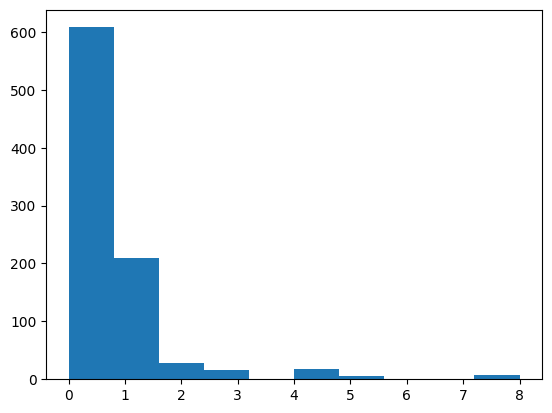

In [27]:
plt.hist(df["SibSp"])

(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

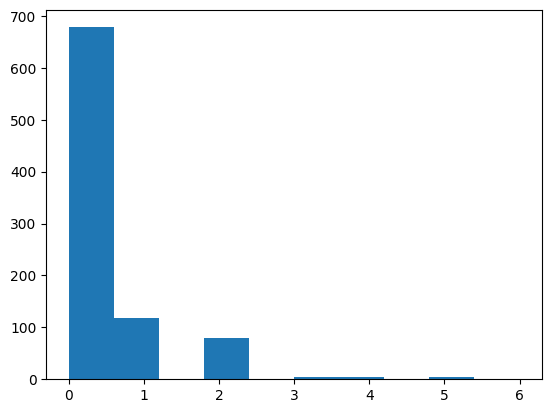

In [28]:
plt.hist(df["Parch"])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

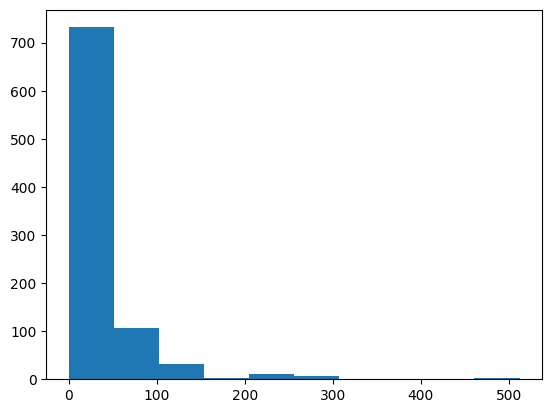

In [29]:
 plt.hist(df["Fare"])

Note: Since all these columns SibSb, Parch and Fare are reciprocally distributed.(y=1/x) So we will use use minmax scaler

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
minmaxscaling=MinMaxScaler()

In [32]:
df1[["SibSp", "Parch", "Fare"]]=minmaxscaling.fit_transform(df1[["SibSp", "Parch", "Fare"]])

In [33]:
df1

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,-0.592481,0.125,0.000000,0.014151,0,1,0,0,1,0,0,1
1,2,1,0.638789,0.125,0.000000,0.139136,1,0,1,0,0,1,0,0
2,3,1,-0.284663,0.000,0.000000,0.015469,1,0,0,0,1,0,0,1
3,4,1,0.407926,0.125,0.000000,0.103644,1,0,0,0,1,1,0,0
4,5,0,0.407926,0.000,0.000000,0.015713,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,-0.207709,0.000,0.000000,0.025374,0,1,0,0,1,0,1,0
887,888,1,-0.823344,0.000,0.000000,0.058556,1,0,0,0,1,1,0,0
888,889,0,0.000000,0.125,0.333333,0.045771,1,0,0,0,1,0,0,1
889,890,1,-0.284663,0.000,0.000000,0.058556,0,1,1,0,0,1,0,0


Heatmap showing the correation between each attributes

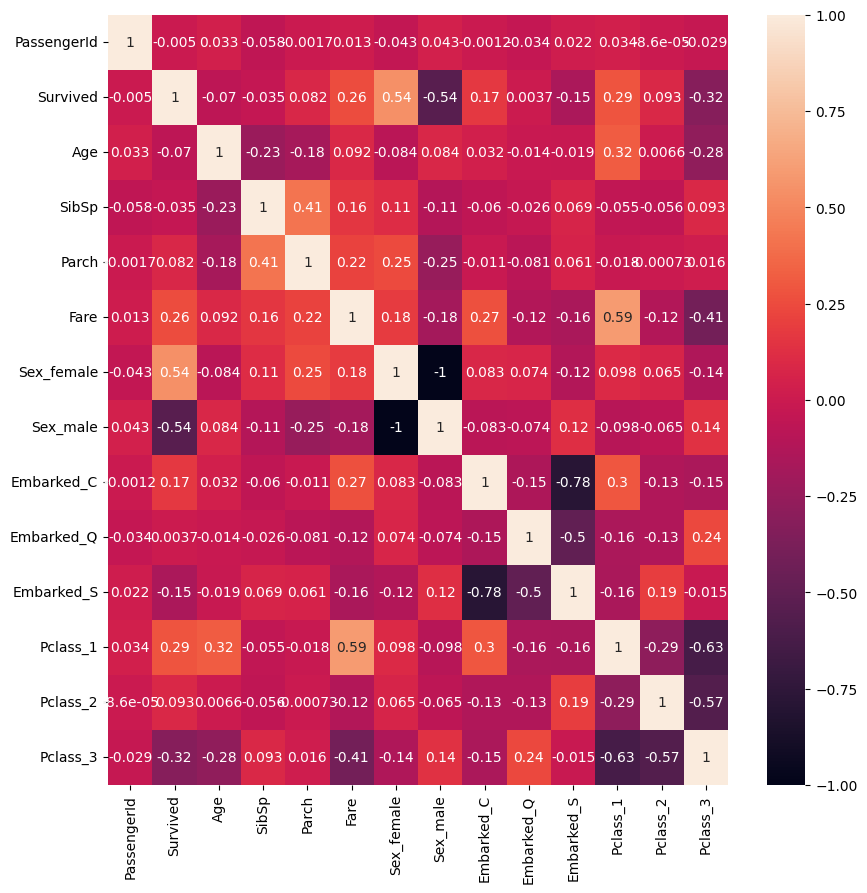

In [35]:
import seaborn as sns
cor = df1.corr()
top_corr_features = cor.index
plt.figure(figsize=(10,10))
sns=sns.heatmap(df1[top_corr_features].corr(), annot=True)

## Applying KNN

In [36]:
y=df1["Survived"]
x=df1.drop(["Survived"], axis=1)

In [37]:
x

,PassengerId,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,-0.592481,0.125,0.000000,0.014151,0,1,0,0,1,0,0,1
1,2,0.638789,0.125,0.000000,0.139136,1,0,1,0,0,1,0,0
2,3,-0.284663,0.000,0.000000,0.015469,1,0,0,0,1,0,0,1
3,4,0.407926,0.125,0.000000,0.103644,1,0,0,0,1,1,0,0
4,5,0.407926,0.000,0.000000,0.015713,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,-0.207709,0.000,0.000000,0.025374,0,1,0,0,1,0,1,0
887,888,-0.823344,0.000,0.000000,0.058556,1,0,0,0,1,1,0,0
888,889,0.000000,0.125,0.333333,0.045771,1,0,0,0,1,0,0,1
889,890,-0.284663,0.000,0.000000,0.058556,0,1,1,0,0,1,0,0


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,17):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x,y,cv=9)
    knn_scores.append(score.mean())

In [39]:
knn_scores

[0.45454545454545453,
 0.4635241301907968,
 0.4579124579124579,
 0.4792368125701459,
 0.45566778900112226,
 0.49831649831649827,
 0.49270482603815935,
 0.5129068462401796,
 0.489337822671156,
 0.510662177328844,
 0.47138047138047134,
 0.4960718294051627,
 0.4949494949494949,
 0.505050505050505,
 0.5039281705948373,
 0.5241301907968574]

Text(0.5, 1.0, 'K neighbors classifier scores for different values of k')

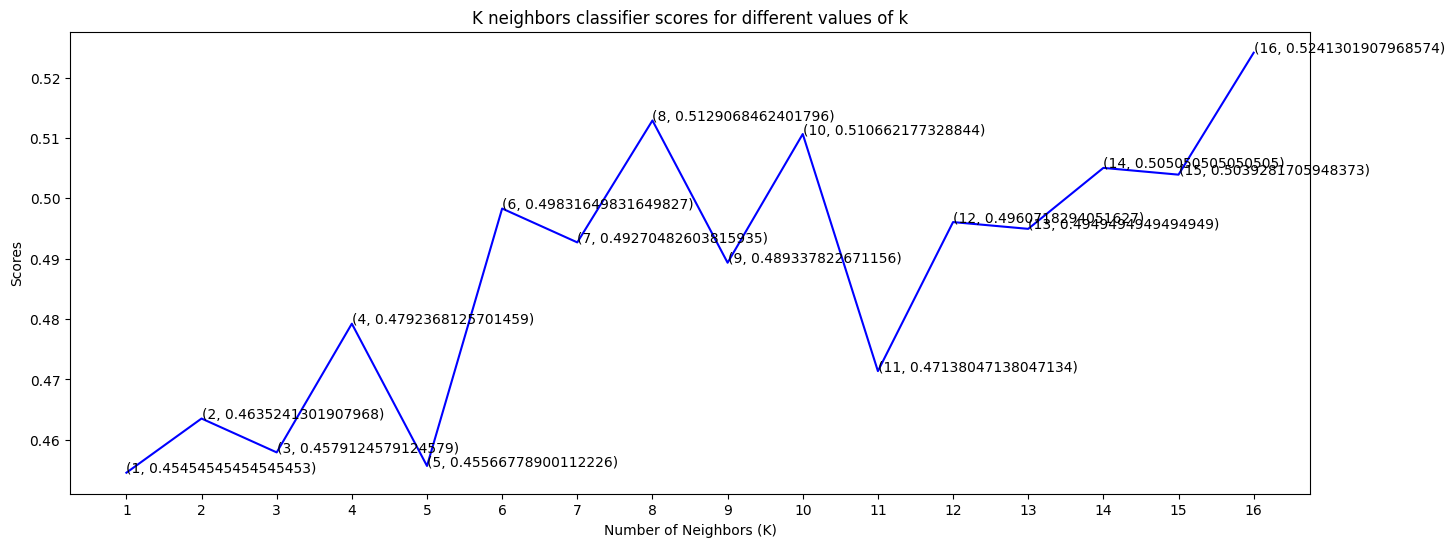

In [40]:
plt.figure(figsize=(16, 6))
plt.plot([k for k in range(1,17)], knn_scores, color="blue")
for i in range(1,17):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1,17)])
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Scores")
plt.title("K neighbors classifier scores for different values of k")

## KNN Model

In [41]:
knn_classifier = KNeighborsClassifier(n_neighbors = 16)
score=cross_val_score(knn_classifier,x,y,cv=9)
   

In [42]:
Accuracy_KNN = score.mean()

In [43]:
Accuracy_KNN

0.5241301907968574

## Applying Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [53]:
X_train

,PassengerId,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
652,653,-0.669435,0.000,0.000000,0.016461,0,1,0,0,1,0,0,1
478,479,-0.592481,0.000,0.000000,0.014680,0,1,0,0,1,0,0,1
347,348,0.000000,0.125,0.000000,0.031425,1,0,0,0,1,0,0,1
197,198,0.946606,0.000,0.166667,0.016404,0,1,0,0,1,0,0,1
208,209,-1.054207,0.000,0.000000,0.015127,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,588,2.331785,0.125,0.166667,0.154588,0,1,1,0,0,1,0,0
715,716,-0.823344,0.000,0.000000,0.014932,0,1,0,0,1,0,0,1
210,211,-0.438572,0.000,0.000000,0.013761,0,1,0,0,1,0,0,1
613,614,0.000000,0.000,0.000000,0.015127,0,1,0,1,0,0,0,1


In [54]:
y_test

19     1
755    1
262    0
364    0
697    1
      ..
412    1
435    1
659    0
625    0
701    1
Name: Survived, Length: 179, dtype: int64

In [55]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
Accuracy_RFC = model.score(X_test, y_test)

In [57]:
Accuracy_RFC

0.8044692737430168

Fine tuning the model

In [58]:
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [60]:
Accuracy_RFC = model.score(X_test, y_test)
Accuracy_RFC

0.8324022346368715

Now comparing the accuracy of these two classifiers

Text(0.5, 1.0, 'Comparison of KNN and RFC Accuracy')

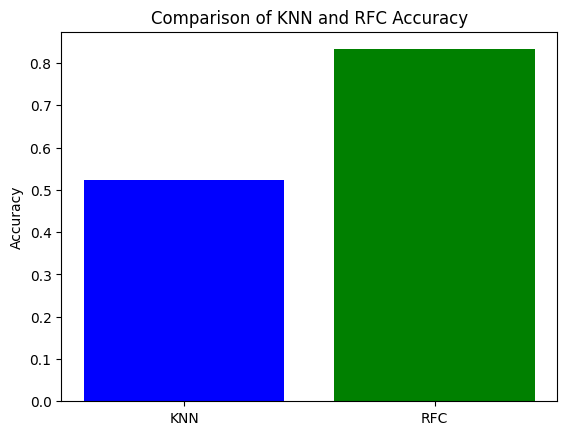

In [63]:
plt.bar(['KNN'], [Accuracy_KNN], label='KNN', color='blue')
plt.bar(['RFC'], [Accuracy_RFC], label='RFC', color='green')
plt.ylabel('Accuracy')
plt.title('Comparison of KNN and RFC Accuracy')

## Conclusion

Here, the accuracy given by the KNN is only 52% whereas the accuracy of the Random Forest Classifier is 83%. So we can see that random forest classifier classifies way more accurately compared to K nearest neighbor.